# **Breast Cancer Diagnostic using Federated Learning setting**


##Import the Libraries

In [ ]:
!pip install syft==0.2.9

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Downloading the Data from Kaggle

Here we connect to kaggle using kaggle.json to download the relevant dataset from kaggle directly into colab. Please make sure to generate and save kaggle.json prior to running this cell. As this will prompt you to upload kaggle.json file.


In [ ]:
 ! pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaibhav1207","key":"2cb828272ec004d323220c53b8d47f75"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                                      2022 Ukraine Russia War                            2KB  2022-04-27 08:05:38          12257        663  1.0              
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            426        441  0.9375           
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           2322         53  0.8235294        


In [ ]:
! kaggle datasets download uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 26.7MB/s]


In [ ]:
! unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


This dataset can also be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none



In [ ]:
df_cancer = pd.read_csv('/content/data.csv')

In [ ]:
df_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df_cancer.shape

(569, 33)

In [ ]:
# removing unnecessary columns
df_cancer.drop(['Unnamed: 32','id'], inplace = True, axis=1,)

In [ ]:
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


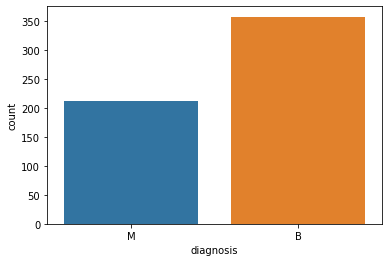

In [ ]:
# counting the number of labels
_ = sns.countplot(df_cancer.diagnosis,label="Count")
B, M = df_cancer.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Class distribution: 357 benign, 212 malignant

In [ ]:
# mapping labels
df_cancer['diagnosis']=df_cancer['diagnosis'].map({'M':1,'B':0})

In [ ]:
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_cancer.shape

(569, 31)

Coverting dataset into numpy array

In [ ]:
df_cancer=np.array(df_cancer, dtype = np.float32)

In [ ]:
df_cancer.shape


(569, 31)

Functions for randomly splitting this dataset in 2: Training dataset (80% samples) and testing dataset (20% samples).

In [ ]:
def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 80):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

n_samples, n_dimensions = df_cancer.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = df_cancer[train_indexes]
test_data = df_cancer[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)

We print the training dataset. It has 455 samples (455 rows), and 30 features and 1 diagnoses (31 columns).

As we can see, the diagnosis( B and M) is parsed into a real number: 1. and 0.

In [ ]:
print_dataset('Train', train_data)

Dataset Train. Shape: (455, 31)
[[ 1.      15.37    22.76    ...  0.1476   0.2556   0.06828]
 [ 1.      19.8     21.56    ...  0.182    0.307    0.08255]
 [ 0.      12.56    19.07    ...  0.09265  0.2121   0.07188]
 ...
 [ 1.      16.11    18.05    ...  0.1216   0.2792   0.08158]
 [ 1.      13.82    24.49    ...  0.1521   0.3651   0.1183 ]
 [ 1.      21.75    20.99    ...  0.1841   0.2833   0.08858]]


We print the testing dataset. It has 114 samples (114 rows), and 30 features and 1 diagnoses (31 columns).

In [ ]:
print_dataset('Train', test_data)

Dataset Train. Shape: (114, 31)
[[ 0.      10.51    23.09    ...  0.03125  0.2227   0.06777]
 [ 0.      12.49    16.85    ...  0.02784  0.1917   0.06174]
 [ 1.      15.08    25.74    ...  0.1526   0.2654   0.09438]
 ...
 [ 0.      14.69    13.98    ...  0.1108   0.2827   0.09208]
 [ 0.      13.45    18.3     ...  0.07911  0.2678   0.06603]
 [ 0.      12.34    12.27    ...  0.107    0.311    0.07592]]


We define our machine learning model, which is a logistic regression model.

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

input_size = 30
learning_rate = 0.001
num_iterations = 10000

class Model(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_size, 100)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(100, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = torch.sigmoid(x)
        return x


Training Machine Learning model without federated settings while keeping track of training loss and training accuracy

In [ ]:
def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)

to_percent = lambda x: '{:.2f}%'.format(x)

def compute_accuracy(model, input, output):
    prediction = model(input).data.numpy()[:, 0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return 100. * equal.sum() / n_samples

def get_input_and_output(data):
    input = Variable(torch.tensor(data[:, 1:31], dtype = torch.float32))
    output = Variable(torch.tensor(data[:, 0], dtype = torch.float32))
    return input, output

input, output = get_input_and_output(train_data)
print(input.shape)
test_input, test_output = get_input_and_output(test_data)

import matplotlib.pyplot as plt
%matplotlib inline

diagnosis_title = 'Breast Cancer Diagnosis'

def plot_graphs(diagnosis_title, losses, accuracies):
    plt.plot(losses)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    plt.plot(accuracies)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()

def train_model(diagnosis_title, input, output, test_input, test_output):
    model = Model()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses = []
    accuracies = []
    n_samples, _ = input.shape
    for iteration in range(num_iterations):
            optimizer.zero_grad()
            prediction = model(input)
            loss = criterion(prediction, output.unsqueeze(1))
            loss.backward()
            optimizer.step()
            if iteration % 500 == 0:
                train_acc = compute_accuracy(model, input, output)
                train_loss = loss.item()
                losses.append(train_loss)
                accuracies.append(train_acc)
                print('iteration={}, loss={:.4f}, train_acc={}'.format(iteration, train_loss, to_percent(train_acc)))
    plot_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


torch.Size([455, 30])


iteration=0, loss=15.8554, train_acc=36.04%
iteration=500, loss=0.1472, train_acc=94.95%
iteration=1000, loss=0.0902, train_acc=95.60%
iteration=1500, loss=0.0699, train_acc=96.92%
iteration=2000, loss=0.0598, train_acc=97.80%
iteration=2500, loss=0.0542, train_acc=97.58%
iteration=3000, loss=0.0496, train_acc=97.80%
iteration=3500, loss=0.0461, train_acc=97.80%
iteration=4000, loss=0.0411, train_acc=98.24%
iteration=4500, loss=0.0364, train_acc=98.68%
iteration=5000, loss=0.0358, train_acc=98.24%
iteration=5500, loss=0.0310, train_acc=98.90%
iteration=6000, loss=0.0295, train_acc=98.90%
iteration=6500, loss=0.0279, train_acc=98.90%
iteration=7000, loss=0.0269, train_acc=98.90%
iteration=7500, loss=0.0250, train_acc=99.12%
iteration=8000, loss=0.0239, train_acc=99.12%
iteration=8500, loss=0.0228, train_acc=99.12%
iteration=9000, loss=0.0287, train_acc=98.90%
iteration=9500, loss=0.0210, train_acc=99.12%


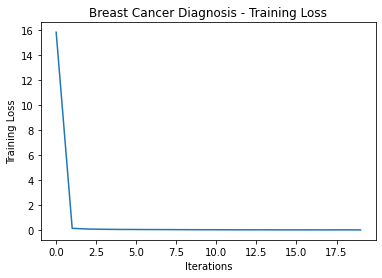

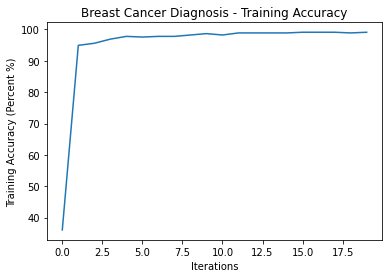


Testing Accuracy = 97.37%


In [ ]:
model = train_model(diagnosis_title, input, output, test_input, test_output)

So far, we have used machine learning in an insecure way. Now, let's implement the techniques of Federated Learning.

# FEDERATED LEARNING

In this demo, there are 13 hospitals each with 35 randomly selected samples. (The dataset will be split in 13, randomly.) There could be more hospitals. The 13 hospitals cannot share the cases of their patients. Hence, the ML model will be learned in a federated way.

How? Federated learning is iterated 100 times. At each iteration, a copy of the shared model is sent to all the 13 hospitals. Each hospital trains its own local model with its own local dataset, in 5 local iterations. Each local model improves a little bit in its own direction. Then we compute the local losses and local accuracies to keep track of them and to make graphs of them. We send the local models to the trusted aggregator that will average all the model updates. This averaged model is the shared model that is sent to all the 13 hospitals at the begining of each iteration.

In this way, only the ML model will be shared. Whereas the local cases of each hospital will be kept private and they will be used to train model updates in a local way. Federated learning will protect the privacy of datasets in each hospital and at the same time, we will generate a more robust machine learning model, which will benefit all hospitals. This shared ML model preserves the privacy of individual patients and at the same time, reveals important statistics of stereotypical cases.



First, we start by creating the virtual workers that simulate the computers of each hospital. And then we establish communications among all of them.

In [ ]:
import syft as sy
import torch as th
hook = sy.TorchHook(th)
from torch import nn, optim

n_hospitals = 13
hospitals = []
for i in range(n_hospitals):
    hospital_name = 'hospital{}'.format(i)
    hospital = sy.VirtualWorker(hook, id = hospital_name)
    hospitals.append(hospital)
secure_worker = sy.VirtualWorker(hook, id="secure_worker")

def get_workers_names(workers):
    return [worker.id for worker in workers]

def add_and_print_workers(worker, workers):
    print('workers of {} = {}'.format(worker.id, get_workers_names(workers)))
    worker.add_workers(workers)

for i in range(n_hospitals):
    workers = [hospitals[i2] for i2 in range(n_hospitals) if i2 != i] + [secure_worker]
    add_and_print_workers(hospitals[i], workers)
add_and_print_workers(secure_worker, hospitals)


Worker hospital1 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital3 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital4 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital5 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital6 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital7 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital8 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital9 already exists. Replacing old worker which could cause                     unexpected b

workers of hospital0 = ['hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']
workers of hospital1 = ['hospital0', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']
workers of hospital2 = ['hospital0', 'hospital1', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']
workers of hospital3 = ['hospital0', 'hospital1', 'hospital2', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']


Worker hospital4 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital5 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital6 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital7 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital8 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital9 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital10 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital11 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital12 already exists. Replacing old worker which could cause                     unexpecte

workers of hospital4 = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']
workers of hospital5 = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']
workers of hospital6 = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']


Worker hospital8 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital9 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital10 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital11 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital12 already exists. Replacing old worker which could cause                     unexpected behavior
Worker secure_worker already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital0 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital1 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexp

workers of hospital7 = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']
workers of hospital8 = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital9', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']
workers of hospital9 = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital10', 'hospital11', 'hospital12', 'secure_worker']


Worker hospital12 already exists. Replacing old worker which could cause                     unexpected behavior
Worker secure_worker already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital0 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital1 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital3 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital4 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital5 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital6 already exists. Replacing old worker which could cause                     unexpec

workers of hospital10 = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital11', 'hospital12', 'secure_worker']
workers of hospital11 = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital12', 'secure_worker']
workers of hospital12 = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'secure_worker']


Worker hospital1 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital3 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital4 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital5 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital6 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital7 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital8 already exists. Replacing old worker which could cause                     unexpected behavior
Worker hospital9 already exists. Replacing old worker which could cause                     unexpected b

workers of secure_worker = ['hospital0', 'hospital1', 'hospital2', 'hospital3', 'hospital4', 'hospital5', 'hospital6', 'hospital7', 'hospital8', 'hospital9', 'hospital10', 'hospital11', 'hospital12']


Each virtual worker in each hospital is supposed to have some cases of patients, their own local datasets. The 13 hospitals cannot share the cases of their patients because it is necessary to protect the privacy of patients. So, the local cases of each hospital will be kept private and they will be used to train model updates in a local way.

In order to simulate this process, we start by dividing the dataset in 13 parts, randomly. And then we send each part to each hospital. Each part is composed of the features, the diagnosis for disease.

In [ ]:
n_samples = train_data.shape[0]
samples_per_hospital = int((n_samples + 0.5) / n_hospitals)
hospital_features = []
hospital_targets = []
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
for i in range(n_hospitals):
    train_data2 = train_data[i * samples_per_hospital:(i + 1) * samples_per_hospital].clone().detach().requires_grad_(True)
    features = train_data2[:, 1:31].clone().detach().requires_grad_(True)
    targets = train_data2[:, 0][:, None].clone().detach()
    hospital_features.append(features.send(hospitals[i]))
    hospital_targets.append(targets.send(hospitals[i]))

print(model)

Model(
  (linear1): Linear(in_features=30, out_features=100, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)


Functions to train the machine learning model in a federated way for each hospital separately.

At each iteration, a copy of the shared model is sent to all the 13 hospitals. Each hospital trains its own local model with its own local dataset, in 5 local iterations. (We can vary the number of local iterations.)  We send the local models to the trusted aggregator that will average all the model updates. This averaged model is the shared model that is sent to all the 13 hospitals at the begining of each iteration.

Finally, we compute the testing accuracy of the final model with the testing dataset we separated since the beginning.

We use FedAvg algorithm here

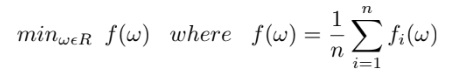

In [ ]:
def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()

def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 100 #2000
worker_iterations = 5

def federated_learning_with_fedavg(diagnosis_title, hospital_features, hospital_targets, test_input, test_output):
    model = Model()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    for iteration in range(iterations):
        models = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        optimizers = [torch.optim.Adam(params = models[i].parameters(), lr = learning_rate) for i in range(n_hospitals)]
        for worker_iteration in range(worker_iterations):
            last_losses = []
            for i in range(n_hospitals):
                optimizers[i].zero_grad()
                prediction = models[i](hospital_features[i])
                loss = criterion(prediction, hospital_targets[i])
                loss.backward()
                optimizers[i].step()
                loss = loss.get().data.item()
                last_losses.append(loss)
        for i in range(n_hospitals):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], hospital_features[i], hospital_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear1.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear1.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear1.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear1.bias.set_(avg_bias.get())
            avg_weight = sum([models[i].linear2.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear2.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear2.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear2.bias.set_(avg_bias.get())

        if iteration % 10 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


Iteration=0, losses=['9.7591', '1.6091', '7.4094', '8.4992', '6.8343', '4.8151', '6.0003', '4.6433', '2.6214', '6.7064', '2.8918', '9.3110', '4.3801'], accuracies=['57.14%', '91.43%', '68.57%', '60.00%', '62.86%', '82.86%', '71.43%', '80.00%', '88.57%', '74.29%', '82.86%', '60.00%', '82.86%']
Iteration=10, losses=['0.2619', '0.4983', '0.7976', '0.3822', '0.3484', '0.5124', '0.8143', '0.9397', '1.0822', '1.0135', '0.6088', '0.6931', '0.3637'], accuracies=['91.43%', '91.43%', '82.86%', '85.71%', '91.43%', '91.43%', '82.86%', '85.71%', '85.71%', '82.86%', '85.71%', '85.71%', '88.57%']
Iteration=20, losses=['0.2538', '0.4025', '0.5506', '0.3638', '0.3782', '0.3906', '0.7344', '0.8012', '0.9514', '0.9776', '0.5035', '0.5713', '0.3260'], accuracies=['91.43%', '91.43%', '82.86%', '91.43%', '94.29%', '91.43%', '85.71%', '82.86%', '85.71%', '82.86%', '85.71%', '88.57%', '91.43%']
Iteration=30, losses=['0.2473', '0.3650', '0.5374', '0.3018', '0.3560', '0.3106', '0.6973', '0.7343', '0.9200', '0.9

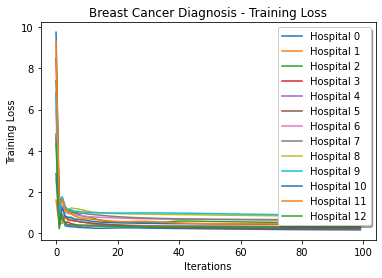

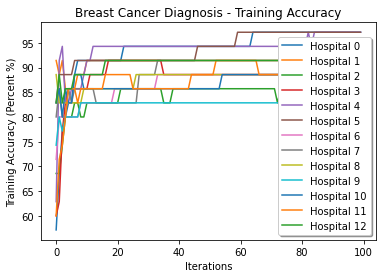


Testing Accuracy = 90.35%


In [ ]:
model = federated_learning_with_fedavg(diagnosis_title, hospital_features, hospital_targets, test_input, test_output)

We again divide the datatset into 13 parts and send each part to a different hospital for the FedProx Algorithm  

In [ ]:
n_samples = train_data.shape[0]
samples_per_hospital = int((n_samples + 0.5) / n_hospitals)
hospital_features = []
hospital_targets = []
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
for i in range(n_hospitals):
    train_data2 = train_data[i * samples_per_hospital:(i + 1) * samples_per_hospital].clone().detach().requires_grad_(True)
    features = train_data2[:, 1:31].clone().detach().requires_grad_(True)
    targets = train_data2[:, 0][:, None].clone().detach()
    hospital_features.append(features.send(hospitals[i]))
    hospital_targets.append(targets.send(hospitals[i]))

print(model)

Model(
  (linear1): Linear(in_features=30, out_features=100, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)


We have used FedProx Algorithm with the same dataset but without any systems hetrogeneity

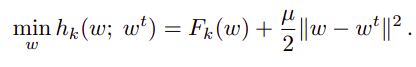

In [ ]:
def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()

def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 100 #2000
worker_iterations = 5

def difference_models_norm_2(model_1, model_2):
    """Return the norm 2 difference between the two model parameters
    """

    tensor_1=list(model_1.parameters())
    tensor_2=list(model_2.parameters())

    norm=sum([torch.sum((tensor_1[i]-tensor_2[i])**2)
        for i in range(len(tensor_1))])

    return norm

def federated_learning_with_fedprox(diagnosis_title, hospital_features, hospital_targets, test_input, test_output, mu):
    model = Model()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    for iteration in range(iterations):
        models = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        models_0 = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        optimizers = [torch.optim.Adam(params = models[i].parameters(), lr = learning_rate) for i in range(n_hospitals)]
        for worker_iteration in range(worker_iterations):
            last_losses = []
            for i in range(n_hospitals):
                optimizers[i].zero_grad()
                prediction = models[i](hospital_features[i])
                loss = criterion(prediction, hospital_targets[i])
                loss += mu/2*difference_models_norm_2(models[i],models_0[i])
                loss.backward()
                optimizers[i].step()
                loss = loss.get().data.item()
                last_losses.append(loss)
        for i in range(n_hospitals):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], hospital_features[i], hospital_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear1.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear1.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear1.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear1.bias.set_(avg_bias.get())
            avg_weight = sum([models[i].linear2.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear2.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear2.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear2.bias.set_(avg_bias.get())

        if iteration % 10 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


Iteration=0, losses=['17.2835', '6.8167', '14.5981', '29.2753', '24.0273', '14.1034', '19.1995', '19.2814', '14.3955', '15.8752', '13.0003', '17.1122', '15.0563'], accuracies=['57.14%', '80.00%', '57.14%', '48.57%', '54.29%', '71.43%', '62.86%', '68.57%', '71.43%', '65.71%', '74.29%', '60.00%', '60.00%']
Iteration=10, losses=['0.6974', '0.3222', '1.9928', '1.0761', '0.5740', '0.2237', '0.7090', '0.5138', '0.5983', '0.6349', '0.3002', '1.2908', '0.2657'], accuracies=['82.86%', '91.43%', '62.86%', '74.29%', '82.86%', '85.71%', '68.57%', '68.57%', '77.14%', '77.14%', '80.00%', '68.57%', '80.00%']
Iteration=20, losses=['0.5137', '0.3242', '1.3813', '0.9751', '0.4742', '0.1543', '0.5837', '0.4964', '0.8072', '0.4935', '0.3337', '0.8076', '0.1142'], accuracies=['88.57%', '97.14%', '62.86%', '80.00%', '91.43%', '91.43%', '74.29%', '77.14%', '82.86%', '82.86%', '77.14%', '77.14%', '80.00%']
Iteration=30, losses=['0.4147', '0.2473', '1.3979', '0.9268', '0.4109', '0.1369', '0.5560', '0.4554', '0

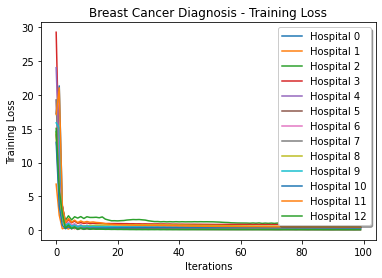

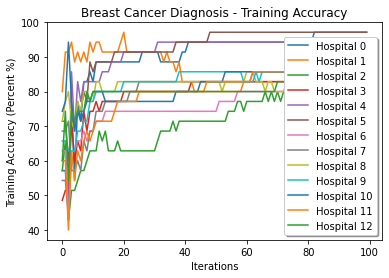


Testing Accuracy = 89.47%


In [ ]:
model = federated_learning_with_fedprox(diagnosis_title, hospital_features, hospital_targets, test_input, test_output, mu = 0.3)

We again divide the datatset into 13 parts and send each part to a different hospital for the FedProx Algorithm  

In [ ]:
n_samples = train_data.shape[0]
samples_per_hospital = int((n_samples + 0.5) / n_hospitals)
hospital_features = []
hospital_targets = []
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
for i in range(n_hospitals):
    train_data2 = train_data[i * samples_per_hospital:(i + 1) * samples_per_hospital].clone().detach().requires_grad_(True)
    features = train_data2[:, 1:31].clone().detach().requires_grad_(True)
    targets = train_data2[:, 0][:, None].clone().detach()
    hospital_features.append(features.send(hospitals[i]))
    hospital_targets.append(targets.send(hospitals[i]))

print(model)

Model(
  (linear1): Linear(in_features=30, out_features=100, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)


We have used FedProx Algorithm with the same dataset but with systems hetrogeneity where each hospitals performs variable number of local epochs (depending on hospital's system capibility) before aggregation.  

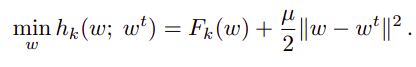

In [ ]:
def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()

def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 100 #2000
worker_iterations = [5,3,4,3,2,5,5,1,3,3,4,2,1]

def difference_models_norm_2(model_1, model_2):
    """Return the norm 2 difference between the two model parameters
    """

    tensor_1=list(model_1.parameters())
    tensor_2=list(model_2.parameters())

    norm=sum([torch.sum((tensor_1[i]-tensor_2[i])**2)
        for i in range(len(tensor_1))])

    return norm

def federated_learning_with_fedprox(diagnosis_title, hospital_features, hospital_targets, test_input, test_output, mu):
    model = Model()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    for iteration in range(iterations):
        models = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        models_0 = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        optimizers = [torch.optim.Adam(params = models[i].parameters(), lr = learning_rate) for i in range(n_hospitals)]
        last_losses = []
        for i in range(len(worker_iterations)):
            for j in range(worker_iterations[i]):
                  optimizers[i].zero_grad()
                  prediction = models[i](hospital_features[i])
                  loss = criterion(prediction, hospital_targets[i])
                  loss += mu/2*difference_models_norm_2(models[i],models_0[i])
                  loss.backward()
                  optimizers[i].step()
                  if j == (worker_iterations[i]-1):
                    loss = loss.get().data.item()
                    last_losses.append(loss)
        for i in range(n_hospitals):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], hospital_features[i], hospital_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear1.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear1.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear1.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear1.bias.set_(avg_bias.get())
            avg_weight = sum([models[i].linear2.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear2.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear2.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear2.bias.set_(avg_bias.get())

        if iteration % 10 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


Iteration=0, losses=['0.7223', '6.9478', '1.9581', '5.2774', '11.0758', '0.9452', '0.5456', '21.9904', '4.9850', '6.4024', '2.1189', '14.3756', '12.1327'], accuracies=['42.86%', '62.86%', '65.71%', '74.29%', '65.71%', '40.00%', '40.00%', '54.29%', '80.00%', '77.14%', '77.14%', '54.29%', '71.43%']
Iteration=10, losses=['1.9145', '0.3905', '0.9871', '0.8037', '2.6303', '1.2345', '1.3780', '1.3897', '0.4501', '0.3016', '1.1452', '2.3926', '0.3750'], accuracies=['80.00%', '71.43%', '48.57%', '54.29%', '91.43%', '65.71%', '68.57%', '60.00%', '60.00%', '85.71%', '77.14%', '68.57%', '80.00%']
Iteration=20, losses=['1.2520', '0.3692', '0.5791', '0.8604', '1.6709', '1.2436', '1.2221', '1.2902', '0.3884', '0.2433', '0.5246', '1.6571', '0.2334'], accuracies=['80.00%', '80.00%', '74.29%', '88.57%', '97.14%', '77.14%', '88.57%', '54.29%', '88.57%', '77.14%', '80.00%', '71.43%', '48.57%']
Iteration=30, losses=['1.0327', '0.3339', '0.4355', '0.7727', '2.2047', '1.3095', '1.1612', '1.1408', '0.2900', 

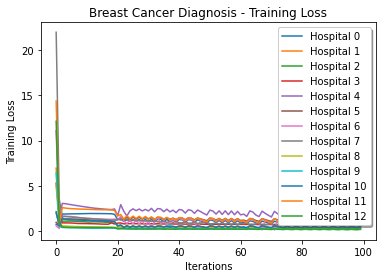

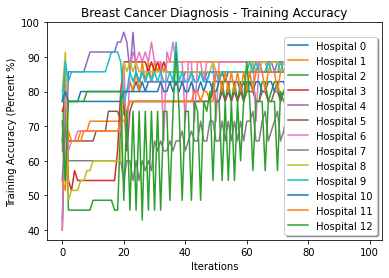


Testing Accuracy = 91.23%


In [ ]:
model = federated_learning_with_fedprox(diagnosis_title, hospital_features, hospital_targets, test_input, test_output, mu = 0.3)

The learning curves **Training Losses versus Iterations** and **Training Accuracies versus Iterations** have 13 colors for all 13 hospitals.